In [1]:
# push!(LOAD_PATH, "/home/artur/BondPricing/Julia/modules/")

3-element Array{Any,1}:
 "/usr/local/julia/0.6.0/local/share/julia/site/v0.6"
 "/usr/local/julia/0.6.0/share/julia/site/v0.6"      
 "/home/artur/BondPricing/Julia/modules/"            

In [ ]:
module_path = "/home/artur/BondPricing/Julia/modules/"
modnames = ["AnalyticFunctions", "BondPrInterp", "Eq]
for mod in modnames
    include(string(joinpath(module_path, mod), "/", mod, ".jl"))
end



include(string(LOAD_PATH[end], "ModelObj.jl"))
include(string(LOAD_PATH[end], "AnalyticFunctions/AnalyticFunctions.jl"))
include(string(LOAD_PATH[end], "BondPrInterp/BondPrInterp.jl"))

INFO: Precompiling module Distributions.


In [10]:
pardict = Dict("V0" => 100, 
               "vbl" => 60, 
               "vbh" => 62, 
                "m" => 1.,
                "c" => 6.39,
                "p" => 61.68,
                "sigmal" => .25,
                "sigmah" => .25,
                "r" => .08,
                "gross_delta" => .02,
                "iota" => .0,
                "xi" => 1.,
                "kappa" => .015,
                "alpha" => .6,
                "pi" => .27,
                "lambda" => .3)

svm = ModelObj.firm_constructor(pardict)

ModelObj.Firm
  V0: Float32 100.0
  c: Float32 6.39
  p: Float32 61.68
  vbl: Float32 60.0
  vbh: Float32 62.0
  pm: ModelObj.FirmParams


In [1]:
module_path = "/home/artur/BondPricing/Julia/modules/"
include(string(module_path, "AnalyticFunctions.jl"))

ErrorException: could not open file /home/artur/BondPricing/Julia/modules/AnalyticFunctions.jl

In [5]:
include(string(LOAD_PATH[end], "BondPrInterp.jl"))

BondPrInterp

In [6]:
f0fd, f1fd, f2fd, f3fd = @time BondPrInterp.fd_interp(svm)

([-0.0788772, -197.597, -1233.51, -3806.47, -8615.14, -16358.2, -27734.3, -43442.0, -64180.1, -90647.3, -1.23542e5, -1.63563e5, -2.11409e5, -2.67779e5, -3.33371e5, -4.08884e5, -4.95017e5, -5.92468e5, -7.01936e5, -8.24119e5], [0.249562, 3.52829, 20.7161, 63.4038, 143.182, 271.643, 460.376, 720.972, 1065.02, 1504.12, 2049.85, 2713.81, 3507.59, 4442.77, 5530.96, 6783.74, 8212.69, 9829.42, 11645.5, 13672.6], [0.239906 -0.0102545 … -17.7145 -45.7497; 3.89063 -36.9827 … -2974.69 -7628.06; … ; 12934.5 -1.27125e5 … -1.02112e7 -2.61852e7; 15185.8 -1.49251e5 … -1.19885e7 -3.07427e7], [-0.0026339 0.16935 … 13.1455 33.7193; -0.476998 26.4376 … 2118.97 5438.55; … ; -1651.47 90137.6 … 7.25132e6 1.86125e7; -1938.92 1.05826e5 … 8.51339e6 2.1852e7])

 83.642335 seconds (16.11 M allocations: 2.414 GiB, 0.75% gc time)


In [8]:
f3fd[.5, .8]

0.0003952157908284026

In [7]:
f3fd[.5, .8]

0.0003952824842836157

In [11]:
vbl = float(63)
vbh = AnalyticFunctions.zhi_vb(svm.pm.m, svm.c, svm.p, svm.pm.sigmah, svm.pm.r, 
                               svm.pm.gross_delta, svm.pm.iota, svm.pm.xi, 
                               svm.pm.kappa, svm.pm.alpha, svm.pm.pi)
vt = log(svm.V0/vbl)
vbhl = vbh/vbl

1.0836709442108965

In [ ]:
include(string(LOAD_PATH[end], "AnalyticFunctions.jl"))
include(string(LOAD_PATH[end], "BondPrInterp.jl"))

In [5]:
f0mat, f1mat, f2mat, f3mat = @time BondPrInterp.mat_interp(vt, vbhl, svm)

([0.00459511, -0.241659, -3.29796, -12.6722, -31.8744, -64.4144, -113.802, -183.548, -277.161, -398.153, -550.032, -736.308, -960.493, -1226.09, -1536.62, -1895.59, -2306.51, -2772.88, -3298.22, -3886.03], [0.24464, 8.66708, 94.5459, 354.416, 884.939, 1782.78, 3144.59, 5067.04, 7646.79, 10980.5  …  1.56223e10, 1.56697e10, 1.57172e10, 1.57648e10, 1.58125e10, 1.58603e10, 1.59081e10, 1.59561e10, 1.60042e10, 1.60524e10], [0.212317, 0.512789, 2.62599, 8.81531, 21.3453, 42.4804, 74.4851, 119.624, 180.162, 258.363, 356.491, 476.812, 621.589, 793.088, 993.573, 1225.31, 1490.56, 1791.59, 2130.66], [0.0194289, 0.0462335, -0.0859069, -0.575506, -1.62115, -3.42143, -6.17493, -10.0802, -15.336, -22.1407, -30.6929, -41.1914, -53.8345, -68.8211, -86.3495, -106.618, -129.827, -156.172, -185.854])

 44.990217 seconds (6.38 M allocations: 694.333 MiB, 0.48% gc time)


In [ ]:
include(string(LOAD_PATH[end], "BondPrInterp.jl"))

In [9]:
BondPrInterp.bondpr(svm, svm.V0, vbl, svm.pm.m, .8, f0fd, f1fd, f2fd, f3fd)

60.85281593062574

In [8]:
include(string(LOAD_PATH[end], "BondPrInterp.jl"))

vmax = .8
Vt = svm.V0
vbl = float(63)

# Here, Vt and vbl should default to the ones used to 
# compute the f functions!
# vmax can be either the value used to compute the f functions 
# or the value given by get_bond_vmax function, if smaller.

BondPrInterp.get_svm_debt_price(svm, vbl, f0mat, f1mat, f2mat, f3mat)

LoadError: [91mUndefVarError: f0mat not defined[39m

In [11]:
include(string(LOAD_PATH[end], "BondPrInterp.jl"))
BondPrInterp.get_bond_Vmax(svm; print=true)

148.58571920852654

Bond Percentage Difference: 0.0003390239237384991


In [12]:
include(string(LOAD_PATH[end], "BondPrInterp.jl"))
@time BondPrInterp.get_cvm_debt_price(svm, svm.pm.sigmah, N1=30)

61.23505088968668

  0.269547 seconds (247.39 k allocations: 11.429 MiB, 3.35% gc time)


In [10]:
include(string(LOAD_PATH[end], "BondPrInterp.jl"))
@time BondPrInterp.get_cvm_debt_price(svm, svm.pm.sigmah)

61.23504955365282

  0.237629 seconds (242.44 k allocations: 11.162 MiB, 3.70% gc time)


In [17]:
include(string(LOAD_PATH[end], "EqFinDiff.jl"))

EqFinDiff.get_cvm_eq(200, svm.pm.sigmah, svm)

144.0350002814001

In [26]:
include(string(LOAD_PATH[end], "BondPrInterp.jl"))
include(string(LOAD_PATH[end], "EqFinDiff.jl"))

@time EqFinDiff.get_eq_Vmax(svm)

Vmax: 125.0
phi0: -51.94
phi1: 0.999
pv_rfdebt: 61.94


567.254936738525

debt_abs_per_diff: 9.937494816440229e-5
eq_abs_per_diff:0.0009047503298416057
  0.401377 seconds (1.85 M allocations: 39.678 MiB, 2.59% gc time)


In [ ]:
?EqFinDiff.get_cvm_eq()

In [ ]:
reload(AnalyticFunctions)

In [28]:
svm.pm.gross_delta

Float16(0.02)

In [ ]:
# Need to write the following functions:
# get_bond_vmax!
# get_eq_vmax!

In [37]:
?EqFinDiff.get_eq_Vmax()

No documentation found.

`EqFinDiff.get_eq_Vmax` is a `Function`.

```
# 1 method for generic function "get_eq_Vmax":
get_eq_Vmax(svm; initV, print_diffs) in EqFinDiff at /home/artur/BondPricing/Julia/modules/../functions/EqFinDiff/eq_get_methods.jl:16
```


In [34]:
include(string(LOAD_PATH[end], "BondPrInterp.jl"))
? BondPrInterpd.get_bond_Vmax()

LoadError: [91msyntax: extra token "BondPrInterpd" after end of expression[39m

In [22]:
function bond_price_fun(self, vbl, bondVmax, eqVmax, cte_vol=False)
        # v max
        eq_vmax = log(eqVmax / vbl)
        bond_vmax = log(bondVmax / vbl)

        # Ensure eq_vmax > bond_vmax
        if bond_vmax >= eq_vmax:
            eq_vmax = 1.1 * bond_vmax

        # #######################################
        # ####### Form grid of v values #########
        # #######################################
        # v grid
        lenv = 1500
        v_grid = linspace(eq_vmax, 0., lenv)

        # #######################################
        # ###### Form sub grid of v values ######
        # #######################################
        v_sub_len = 125
        v_lower_sub_grid = linspace(bond_vmax, 0., floor(v_sub_len))
        v_upper_sub_grid = linspace(eq_vmax, 1.025 * bond_vmax, floor(v_sub_len))

        v_sub_grid = np.concatenate([v_upper_sub_grid, v_lower_sub_grid])

        if v_sub_grid[0] != v_grid[0]:
            v_sub_grid[0] = v_grid[0]

        if np.abs(v_sub_grid[-1] - 0.0) > 1e-6:
            v_sub_grid[-1] = 0.0

        # #################################
        # ###### Newly-Issued Bonds #######
        # #################################
        # Newly-Issued Bond Prices
        print('Computing bond prices')
        tic_bond = time()
        # bond_pr = Parallel(n_jobs=5, backend='multiprocessing')(
        #     # delayed(bond_price_function2)(self, vbl, VS, self.get_m(),
        #     #                              V_max, V=vbl * np.exp(v)) for v in v_sub_grid)
        #     delayed(bond_price_function)(self, vbl, self.get_m(),
        #                                  Vt=vbl * np.exp(v),
        #                                  Vmax=Vmax, cte_vol=cte_vol) for v in v_sub_grid)

        if njobs > 1:
            with Parallel(n_jobs=5, backend=joblib_backend) as parallel:
                    acc = 0  # accumulator
                    while acc < len(v_lower_sub_grid):
                        lower_bond_pr = parallel(delayed(bond_price_function)(self,
                                                                              vbl,
                                                                              self.get_m(),
                                                                              Vt=vbl * np.exp(v),
                                                                              Vmax=bondVmax,
                                                                              cte_vol=cte_vol)
                                                 for v in v_lower_sub_grid)
                        acc = len(lower_bond_pr)  # synchronization barrier
        else:
            lower_bond_pr = [bond_price_function(self, vbl,
                                                 self.get_m(),
                                                 Vt=vbl * np.exp(v),
                                                 Vmax=bondVmax,
                                                 cte_vol=cte_vol) for v in v_lower_sub_grid]

        upper_bond_pr = [self.get_rfbond() for v in v_upper_sub_grid]
        bond_pr = np.concatenate([upper_bond_pr, lower_bond_pr])

        # Ensure Monotonicity:
        for j in np.arange(len(bond_pr) - 1, 0, -1):
            if bond_pr[j-1] < bond_pr[j]:
                bond_pr[j-1] = bond_pr[j]

        # Interpolate:
        bpr = sp.interpolate.PchipInterpolator(np.asarray(v_sub_grid[::-1]),
                                               np.asarray(bond_pr[::-1]).astype(np.float))

        # Bond Prices
        # bond_prices = bpr(v_grid[1:-1])
        window_size, poly_order = 101, 3
        bond_prices = savgol_filter(bpr(v_grid[1:-1]), window_size, poly_order)
        print('Finished computing bond prices')
        print('Time to compute bond prices: ' + str(time() - tic_bond))
                                                
        return v_grid, v_sub_grid, bond_pr, bpr, bond_prices
                                                
end

LoadError: [91msyntax: line break in ":" expression[39m

In [239]:
vbl = AnalyticFunctions.get_cvm_vb(svm3, svm3.pm.sigmah)

68.27126948528648

In [173]:
AnalyticFunctions.get_cvm_vb(svm3, svm3.pm.sigmah)

68.2967089427127

In [175]:
AnalyticFunctions.zhi_vb(svm.pm.m, svm.c, svm.p, svm.pm.sigmah, svm.pm.r, 
                               svm.pm.gross_delta, svm.pm.iota, svm.pm.xi, 
                               svm.pm.kappa, svm.pm.alpha, svm.pm.pi)

68.2967089427127

In [179]:


# vbl = float(63)
vbh = get_cvm_vb(svm, svm.pm.sigmah)
vbl = vbh
vt = log(svm.V0/vbl)
vbhl = vbh/vbl

1.0

In [180]:
include(string(LOAD_PATH[end], "AnalyticFunctions.jl"))
include(string(LOAD_PATH[end], "BondPrInterp.jl"))
include(string(LOAD_PATH[end], "EqFinDiff.jl"))

using Interpolations

# function eq_deriv_fun(f, vbl::Float64, x::Float64, h::Float64)
#     return (f(x+h) - f(x))/(vbl * (exp(x+h) - exp(x)))
# end

function deriv_fun(f, x, h)
    return (f(x+h) - f(x))/h
end

get_cvm_vb = AnalyticFunctions.get_cvm_vb
get_rgrow = AnalyticFunctions.get_rgrow
get_param = AnalyticFunctions.get_param
get_cvm_eq = EqFinDiff.get_cvm_eq
get_pv_rfdebt = BondPrInterp.get_pv_rfdebt
bondpr = BondPrInterp.bondpr

bondpr (generic function with 1 method)

In [256]:
vbl * exp.(reverse(v_grid[2:end-1]))

1498-element Array{Float64,1}:
  68.3655
  68.46  
  68.5545
  68.6492
  68.7439
  68.8389
  68.9339
  69.0291
  69.1244
  69.2199
  69.3155
  69.4112
  69.5071
   ⋮     
 531.37  
 532.104 
 532.839 
 533.575 
 534.312 
 535.049 
 535.788 
 536.528 
 537.269 
 538.011 
 538.754 
 539.498 

In [441]:
[1. *(y==x+1) for x in 1:1500, y in 1:1500]

1500×1500 Array{Float64,2}:
 0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  

In [437]:
numrows =4
numcols = 4
[ x>y ? 1 : (y == x + 1 ? 0 : NaN) for x in 1:numrows, y in 1:numcols]

4×4 Array{Real,2}:
 NaN    0  NaN  NaN
   1  NaN    0  NaN
   1    1  NaN    0
   1    1    1  NaN

In [301]:
Array(Diagonal(ones(4,4)))

4×4 Array{Float64,2}:
 1.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0
 0.0  0.0  1.0  0.0
 0.0  0.0  0.0  1.0

In [434]:
Diagonal(ones(2,2), 1)

LoadError: [91mMethodError: no method matching Diagonal(::Array{Float64,2}, ::Int64)[0m
Closest candidates are:
  Diagonal(::AbstractArray{T,2} where T) at linalg/diagonal.jl:29[39m

In [427]:
?Diagonal()

```
Diagonal(A::AbstractMatrix)
```

Constructs a matrix from the diagonal of `A`.

# Example

```jldoctest
julia> A = [1 2 3; 4 5 6; 7 8 9]
3×3 Array{Int64,2}:
 1  2  3
 4  5  6
 7  8  9

julia> Diagonal(A)
3×3 Diagonal{Int64}:
 1  ⋅  ⋅
 ⋅  5  ⋅
 ⋅  ⋅  9
```

```
Diagonal(V::AbstractVector)
```

Constructs a matrix with `V` as its diagonal.

# Example

```jldoctest
julia> V = [1; 2]
2-element Array{Int64,1}:
 1
 2

julia> Diagonal(V)
2×2 Diagonal{Int64}:
 1  ⋅
 ⋅  2
```


In [425]:
A = Array(Diagonal(ones(2,1)), 2)
#              3 * Array(LowerTriangular(ones(3,3)) - 
#                             Diagonal(ones(3,3))) +
#              1 * Array(UpperTriangular(ones(3,3)) - 
#                             Diagonal(ones(3,3)))

LoadError: [91mMethodError: no method matching Array(::Diagonal{Float64}, ::Int64)[0m
Closest candidates are:
  Array([91m::Type{T}[39m, ::Int64) where T at deprecated.jl:56
  Array([91m::Type{T}[39m, ::Int64, [91m::Int64[39m) where T at deprecated.jl:56
  Array([91m::Type{T}[39m, ::Int64, [91m::Int64[39m, [91m::Int64[39m) where T at deprecated.jl:56
  ...[39m

In [442]:
function eq_fin_diff_core(svm, vbl, v_grid, bondpr)
#        V_sub_grid = vbl * exp.(v_sub_grid)
       
        # #################################
        # ######### Equity Values #########
        # #################################
        # Upper Barrier: Value of Equity
        eq_max = get_cvm_eq(vbl * exp(v_grid[1]), svm.pm.sigmah, svm)

        # Note: I can use the CVM value here because both 
        # the cvm and svm equity values will have converged 
        # to the credit-risk-free equity value in the upper
        # barrier.
        
        # ##################################
        # ##### Baseline Model Equity Values #####
        # ##################################
        println("Computing Constant Volatility Equity Values")
        bsm_eqh_vals_Future = @spawn [get_cvm_eq(vbl * exp(v), svm.pm.sigmah, svm) for v=v_grid]
        bsm_eqh_vals = fetch(bsm_eqh_vals_Future)
    
        # Interpolate
#         itp = interpolate(reverse(bsm_eqh_sub_vals), BSpline(Cubic(Line())), OnGrid())
#         bsm_interp_eqh = Interpolations.scale(itp, reverse(v_sub_grid))  # Scale

        # Equity Values
#         bsm_eqh = bsm_interp_eqh(v_grid[2:end-1])
        bsm_eqh = bsm_eqh_vals[2:end-1]
        println("Finished computing Constant Volatility Equity Values")
    
        # #################################
        # ######### Coefficients: #########
        # #################################
        deltav = v_grid[1] - v_grid[2]
        nu = get_rgrow(svm) - .5 * get_param(svm, "sigmal")^2

        qu = .5 * (nu / deltav + get_param(svm, "sigmal")^2 / (deltav^2))
        qd = .5 * (-nu / deltav + get_param(svm, "sigmal")^2 / (deltav^2))
        qm = -(get_param(svm, "r") + get_param(svm, "lambda") + 
                                    get_param(svm, "sigmal")^2 / (deltav^2))

        println("deltav: ", string(deltav))
        println("nu: ", string(nu))
        println("qu: ", string(qu))
        println("qm: ", string(qm))
        println("qd: ", string(qd))
    
        # Present Value of Debt:
        pv_debt = get_pv_rfdebt(svm)
    
        println("Finished computing pv rfdebt")
    
        # Gamma Vector:
        Gamma = (get_param(svm, "delta") * vbl * exp.(v_grid[2:end-1]) - 
                    (1 - get_param(svm, "pi")) * get_param(svm, "C") + 
                    bondpr[2:end-1] - get_param(svm, "p") +
                    get_param(svm, "lambda") * bsm_eqh)
    
        plot(v_grid[2:end-1], bsm_eqh)

        println("Shape of Gamma matrix: ", string(size(Gamma)))
        Gamma[1] += qu * eq_max

        eq_vbl = max(0., get_param(svm, "alpha") * vbl - pv_debt)
        println("eq_vbl: ", string(eq_vbl))
        Gamma[end] += qd * eq_vbl

        # A Matrix:
        A = (qm * Array(Diagonal(ones(length(Gamma)))) +
             qu * [1. *(y==x+1) for x in 1:length(Gamma), y in 1:length(Gamma)] +
             qd * [1. *(y==x-1) for x in 1:length(Gamma), y in 1:length(Gamma)])
#              qu * Array(LowerTriangular(ones(length(Gamma), length(Gamma))) - 
#                             Diagonal(ones(length(Gamma)))) +
#              qd * Array(UpperTriangular(ones(length(Gamma), length(Gamma))) - 
#                             Diagonal(ones(length(Gamma)))))
        
        # ###### Compute Pre-Volatility Shock Equity Function: ######
        # Form Function and add lim_v->infty E(v)
        eq_vals = vcat(eq_max, -\(A, Gamma), eq_vbl)
    
        # Interpolate to back-out equity value at VB:
        eq_interp_itp = interpolate(reverse(eq_vals), BSpline(Cubic(Line())), OnGrid())
        eq_sitp = Interpolations.scale(eq_interp_itp, reverse(v_grid))  # Scale

        # Compute Derivative at Default Barrier:
        h = 1e-5
        inv_v_grid = reverse(v_grid)
        eq_sitp_deriv_fut = @spawn [deriv_fun(eq_sitp, v, h) * (1/(vbl * exp(v))) 
                                        for v=inv_v_grid]
        eq_sitp_deriv = fetch(eq_sitp_deriv_fut)
        eq_deriv_vb = eq_sitp_deriv[1]

        # Equity Values

        # Equity set as function of V:
        e0 = float(eq_sitp[log(get_param(svm, "V0")/vbl)])
    
        # Look for negative values
        eq_min_val = minimum(reverse(eq_vals)[2:end])  # interpolate in a neighborhood
        eq_negative = eq_min_val .< -0.1  # & (np.abs(np.min(eq_vals)) > .025)
        eq_deriv_min_val = minimum(eq_sitp_deriv) 

        eq_dict = Dict("e0" => e0,
                       "eq_max" => eq_max,
                       "eq_vals"=>  eq_vals,
                       "eq_sitp" =>  eq_sitp,
                       "eq_deriv" => eq_deriv_vb,
                       "eq_sitp_deriv" => eq_sitp_deriv,
                       "eq_vb" => eq_vbl,
                       "eq_min_val" => eq_min_val,
                       "eq_negative" => eq_negative,
                       "eq_deriv_min_val" => eq_deriv_min_val, 
                       "invA_Gamma" => - inv(A) * Gamma)

#         println("Total Equity Core Function Computation Time: ", 
#                 string(tic() - tic_bsm_eq))
                                                                
        return Gamma, A, eq_dict
end



eq_fin_diff_core (generic function with 1 method)

In [443]:
typeof(get_param(svm3, "delta"))

Float32

In [444]:
function export_equity_fin_diff_results(svm, vbl, eq_dict, debt=nothing)
#     if debt is None:
#         debt = cls.get_debt_price()  # already set vb and p. (maybe add m and c)

    # Get Firm Value:
    firm_value = NaN # debt + eq_dict["e0"]

    # Compute Leverage:
    lev = NaN# (debt / firm_value) * 100

    # Compute ROE:
    roe = NaN # (eq_dict["e0"] / (svm.V0 - debt) - 1) * 100

    #               "delta": cls.get_delta(),
        #               "debt"=> debt,
    results = Dict("V0"=> svm.V0,
                   "r"=> svm.pm.r,
                   "gross_delta"=> svm.pm.gross_delta,
                   "iota"=> svm.pm.iota,
                   "alpha"=> svm.pm.alpha,
                   "pi"=> svm.pm.pi,
                   "xi"=> svm.pm.xi,
                   "kappa"=> svm.pm.kappa,
                   "lambda"=> svm.pm.lambda,
                   "sigmal"=> svm.pm.sigmal,
                   "sigmah"=> svm.pm.sigmah,
                   "m"=> svm.pm.m,
                   "c"=> svm.c,
                   "p"=> svm.p,
                   "vb"=> vbl,
                   "equity"=> eq_dict["e0"],
                   "eq_deriv"=> eq_dict["eq_deriv"],
                   "firm_value"=> firm_value,
                   "eq_min_val"=> eq_dict["eq_min_val"],
                   "eq_vb"=> eq_dict["eq_vb"],
                   "eq_negative"=> eq_dict["eq_negative"],
                   "eq_deriv_min_val"=> eq_dict["eq_deriv_min_val"],
                   "leverage"=> lev,
                   "ROE"=> roe)

    df = DataFrame(results)

    return results, df
end

export_equity_fin_diff_results (generic function with 2 methods)

In [445]:
function equity_fin_diff(svm, vbl, f0fd, f1fd, f2fd, f3fd; 
                         p=nothing, debt=nothing, full_output=false)
    
    if p==nothing
        p = svm.p
    end

    # V MAX:
    println("Computing Equity Vmax")
    eqVmax = EqFinDiff.get_eq_Vmax(svm)
    println("Equity Vmax: ", string(eqVmax))
    println(" ")

    println("Computing Bond Vmax")
    bondVmax = BondPrInterp.get_bond_Vmax(svm)
    println("Bond Vmax: ", string(bondVmax))
    println(" ")

    # Ensure eq_vmax > bond_vmax
    eqVmax = max(1.25 * bondVmax, eqVmax)
    println("Adjusted Equity Vmax: ", string(eqVmax))
    
    # v max
    eq_vmax = log(eqVmax / vbl)
    bond_vmax = log(bondVmax / vbl)

    # Ensure eq_vmax > bond_vmax
    if bond_vmax >= eq_vmax
        eq_vmax = 1.1 * bond_vmax
    end
    println("eq_vmax: ", string(eq_vmax)) 
    # #######################################
    # ####### Form grid of v values #########
    # #######################################
    lenv = 1500
    v_grid = linspace(eq_vmax, 0., lenv)
    
    bondpr_grid_fut = @spawn [bondpr(svm, vbl * exp(v), vbl, 
                                     svm.pm.m, bond_vmax, 
                                     f0fd, f1fd, f2fd, f3fd) for v=v_grid]
    bondpr_grid = fetch(bondpr_grid_fut)
    
    # #################################
    # ######### Equity Values #########
    # #################################
    println("Finished computing bondpr_grid")
    Gamma, A, eq_dict = eq_fin_diff_core(svm, vbl, v_grid, bondpr_grid)
    
    println("Exporting results... ")
    _, df = export_equity_fin_diff_results(svm, vbl, eq_dict)
    
    return v_grid, eq_dict, Gamma, A, df
end

# ####################################################################
# ####################################################################


equity_fin_diff (generic function with 1 method)

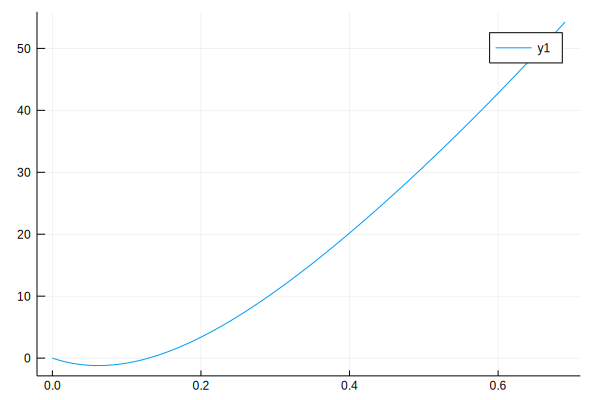

In [451]:
plot(v_grid[1000:end], eq_dict["eq_vals"][1000:end])

In [447]:
v_grid, eq_dict, Gamma, A, df = equity_fin_diff(svm3, vbl, f0fd, f1fd, f2fd, f3fd)

Computing Equity Vmax
Vmax: 125.0
phi0: -51.98393
phi1: 1.0
pv_rfdebt: 61.937
debt_abs_per_diff: 3.760425314438707e-7
eq_abs_per_diff:0.0009374844976252713
Equity Vmax: 540.2427968938333
 
Computing Bond Vmax
Bond Vmax: 148.58571920852654
 
Adjusted Equity Vmax: 540.2427968938333
eq_vmax: 2.068529636060046
Finished computing bondpr_grid
Computing Constant Volatility Equity Values
Finished computing Constant Volatility Equity Values
deltav: 0.0013799397171849748
nu: 0.028749998658895493
qu: 16421.21862242176
qm: -32821.983002370864
qd: 16400.384379953874
Finished computing pv rfdebt
Shape of Gamma matrix: (1498,)
eq_vbl: 0.0


(2.068529636060046:-0.0013799397171848204:0.0, Dict{String,Any}(Pair{String,Any}("eq_min_val", -1.20391),Pair{String,Any}("invA_Gamma", [487.332, 486.247, 485.165, 484.087, 483.011, 481.939, 480.871, 479.805, 478.743, 477.684  …  -0.488131, -0.445281, -0.401118, -0.355638, -0.308837, -0.260708, -0.211248, -0.160452, -0.108314, -0.054832]),Pair{String,Any}("eq_vals", [487.801, 487.332, 486.247, 485.165, 484.087, 483.011, 481.939, 480.871, 479.805, 478.743  …  -0.445281, -0.401118, -0.355638, -0.308837, -0.260708, -0.211248, -0.160452, -0.108314, -0.054832, 0.0]),Pair{String,Any}("eq_deriv", -0.585047),Pair{String,Any}("eq_deriv_min_val", -0.585047),Pair{String,Any}("eq_vb", 0.0),Pair{String,Any}("eq_sitp", [100.956, 438.147, 5.085e7, 4.53359e8, 1.58502e9, 3.82334e9, 7.54583e9, 1.313e10, 2.09534e10, 3.13934e10  …  2.07683e17, 2.08102e17, 2.08521e17, 2.08941e17, 2.09362e17, 2.09783e17, 2.10204e17, 2.10626e17, 2.11049e17, 2.11472e17]),Pair{String,Any}("eq_sitp_deriv", [-0.585047, -0.575099

Exporting results... 


In [418]:
v_grid[end-1] - v_grid[end]

0.0013799397171848204

In [419]:
v_grid[1] - v_grid[2]

0.0013799397171849748

In [386]:
.5 * (-0.028749998658895493/0.001379939717184974 + svm3.pm.sigmal^2/(0.001379939717184974^2))

16400.38437995389

Exporting results... 


In [368]:
vbl * exp.(v_grid) * 16421.21862242176

1500-element Array{Float64,1}:
 8.87145e6
 8.85921e6
 8.84699e6
 8.83479e6
 8.82261e6
 8.81045e6
 8.7983e6 
 8.78616e6
 8.77405e6
 8.76195e6
 8.74987e6
 8.7378e6 
 8.72575e6
 ⋮        
 1.13824e6
 1.13668e6
 1.13511e6
 1.13354e6
 1.13198e6
 1.13042e6
 1.12886e6
 1.1273e6 
 1.12575e6
 1.1242e6 
 1.12265e6
 1.1211e6 

In [371]:
A

1498×1498 Array{Float64,2}:
 -32822.0   16421.2   16421.2   16421.2  …   16421.2   16421.2   16421.2
  16400.4  -32822.0   16421.2   16421.2      16421.2   16421.2   16421.2
  16400.4   16400.4  -32822.0   16421.2      16421.2   16421.2   16421.2
  16400.4   16400.4   16400.4  -32822.0      16421.2   16421.2   16421.2
  16400.4   16400.4   16400.4   16400.4      16421.2   16421.2   16421.2
  16400.4   16400.4   16400.4   16400.4  …   16421.2   16421.2   16421.2
  16400.4   16400.4   16400.4   16400.4      16421.2   16421.2   16421.2
  16400.4   16400.4   16400.4   16400.4      16421.2   16421.2   16421.2
  16400.4   16400.4   16400.4   16400.4      16421.2   16421.2   16421.2
  16400.4   16400.4   16400.4   16400.4      16421.2   16421.2   16421.2
  16400.4   16400.4   16400.4   16400.4  …   16421.2   16421.2   16421.2
  16400.4   16400.4   16400.4   16400.4      16421.2   16421.2   16421.2
  16400.4   16400.4   16400.4   16400.4      16421.2   16421.2   16421.2
      ⋮                

Computing Equity Vmax
Vmax: 125.0
phi0: -51.98393
phi1: 1.0
pv_rfdebt: 61.937
debt_abs_per_diff: 3.760425314438707e-7
eq_abs_per_diff:0.0009374844976252713
Equity Vmax: 540.2427968938333
 
Computing Bond Vmax
Bond Vmax: 148.58571920852654
 
Adjusted Equity Vmax: 540.2427968938333
eq_vmax: 2.068529636060046
Finished computing bondpr_grid
Computing Constant Volatility Equity Values
Finished computing Constant Volatility Equity Values
deltav: 0.0013799397171849748
nu: 0.028749998658895493
qu: 16421.21862242176
qm: -32821.983002370864
qd: 16400.384379953874
Finished computing pv rfdebt
Shape of Gamma matrix: (1498,)
eq_vbl: 0.0


(2.068529636060046:-0.0013799397171848204:0.0, Dict{String,Any}(Pair{String,Any}("eq_min_val", -0.144543),Pair{String,Any}("invA_Gamma", [162.592, -0.144543, -0.144486, -0.14443, -0.144374, -0.144318, -0.144261, -0.144205, -0.144149, -0.144093  …  -0.079542, -0.0795103, -0.0794785, -0.0794467, -0.0794149, -0.0793831, -0.0793512, -0.0793193, -0.0792874, -0.0792555]),Pair{String,Any}("eq_vals", [487.801, 162.592, -0.144543, -0.144486, -0.14443, -0.144374, -0.144318, -0.144261, -0.144205, -0.144149  …  -0.0795103, -0.0794785, -0.0794467, -0.0794149, -0.0793831, -0.0793512, -0.0793193, -0.0792874, -0.0792555, 0.0]),Pair{String,Any}("eq_deriv", -1.06658),Pair{String,Any}("eq_deriv_min_val", -22.1956),Pair{String,Any}("eq_vb", 0.0),Pair{String,Any}("eq_sitp", [-0.106169, -0.141878, -9.79558e9, -8.73364e10, -3.05344e11, -7.36543e11, -1.45366e12, -2.52942e12, -4.03654e12, -6.04776e12  …  -4.0009e19, -4.00897e19, -4.01704e19, -4.02513e19, -4.03323e19, -4.04134e19, -4.04946e19, -4.0576e19, -4.06

Exporting results... 


In [329]:
(svm3.pm.r + svm3.pm.lambda + svm.pm.sigmal ^ 2. / (0.0013799397171849748 ^ 2.))

32821.983002370864

In [287]:
v_grid, eq_dict, ss = equity_fin_diff(svm3, vbl, f0fd, f1fd, f2fd, f3fd)

Computing Equity Vmax
Vmax: 125.0
phi0: -51.98393
phi1: 1.0
pv_rfdebt: 61.937
debt_abs_per_diff: 3.760425314438707e-7
eq_abs_per_diff:0.0009374844976252713
Equity Vmax: 540.2427968938333
 
Computing Bond Vmax
Bond Vmax: 148.58571920852654
 
Adjusted Equity Vmax: 540.2427968938333
eq_vmax: 2.068529636060046
Finished computing bondpr_grid
Computing Constant Volatility Equity Values
Finished computing Constant Volatility Equity Values
qu: 16421.21862242176
qm: -32821.983002370864
qd: 16400.384379953874
Finished computing pv rfdebt
Shape of Gamma matrix: (1498,)
eq_vbl: 0.0


(2.068529636060046:-0.0013799397171848204:0.0, Dict{String,Any}(Pair{String,Any}("eq_min_val", -0.144753),Pair{String,Any}("invA_Gamma", [162.592, -0.144753, -0.144696, -0.144639, -0.144582, -0.144526, -0.144469, -0.144412, -0.144356, -0.144299  …  -0.0793718, -0.0793398, -0.0793078, -0.0792757, -0.0792436, -0.0792115, -0.0791794, -0.0791473, -0.0791151, -0.0790829]),Pair{String,Any}("eq_vals", [487.801, 162.592, -0.144753, -0.144696, -0.144639, -0.144582, -0.144526, -0.144469, -0.144412, -0.144356  …  -0.0793398, -0.0793078, -0.0792757, -0.0792436, -0.0792115, -0.0791794, -0.0791473, -0.0791151, -0.0790829, 0.0]),Pair{String,Any}("eq_deriv", -1.06425),Pair{String,Any}("eq_deriv_min_val", -22.1956),Pair{String,Any}("eq_vb", 0.0),Pair{String,Any}("eq_sitp", [-0.106155, -0.142068, -9.7956e9, -8.73366e10, -3.05344e11, -7.36544e11, -1.45366e12, -2.52942e12, -4.03655e12, -6.04777e12  …  -4.00091e19, -4.00897e19, -4.01705e19, -4.02514e19, -4.03324e19, -4.04135e19, -4.04947e19, -4.0576e19, -4

Exporting results... 


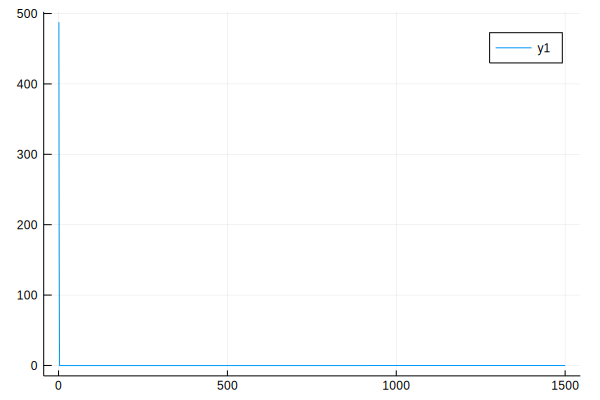

In [337]:
plot(eq_dict["eq_vals"])

In [336]:
plot(v_grid[2:end-1], eq_dict["bsm_eq"])

LoadError: [91mKeyError: key "bsm_eq" not found[39m

In [247]:
using Plots

INFO: Recompiling stale cache file /home/artur/.julia/lib/v0.6/Plots.ji for module Plots.


In [252]:
vbl * exp.(v_grid)

1500-element Array{Float64,1}:
 540.243 
 539.498 
 538.754 
 538.011 
 537.269 
 536.528 
 535.788 
 535.049 
 534.312 
 533.575 
 532.839 
 532.104 
 531.37  
   ⋮     
  69.3155
  69.2199
  69.1244
  69.0291
  68.9339
  68.8389
  68.7439
  68.6492
  68.5545
  68.46  
  68.3655
  68.2713

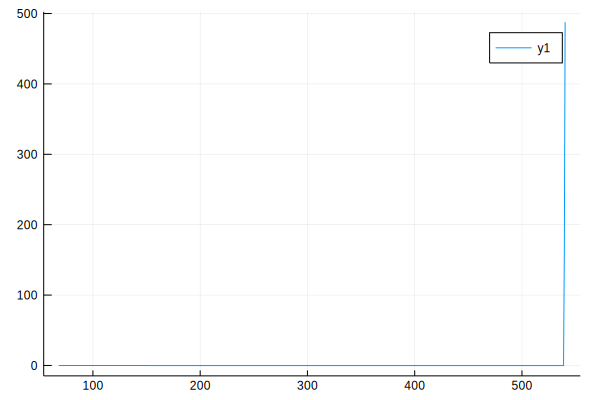

In [255]:
plot(vbl * exp.(v_grid), eq_dict["eq_vals"])

In [253]:
v_grid

2.068529636060046:-0.0013799397171848204:0.0

In [241]:
ss

,ROE,V0,alpha,c,eq_deriv,eq_deriv_min_val,eq_min_val,eq_negative,eq_vb,equity,firm_value,gross_delta,iota,kappa,lambda,leverage,m,p,pi,r,sigmah,sigmal,vb,xi
1,NaN,100.0,0.6,6.39,-1.06425,-22.1956,-0.144753,true,0.0,-0.0883318,NaN,0.02,0.0,0.015,0.3,NaN,1.0,61.68,0.27,0.08,0.25,0.25,68.2713,1.0


In [192]:
ss = equity_fin_diff(svm3, vbl, f0fd, f1fd, f2fd, f3fd)

Computing Equity Vmax
Vmax: 125.0
phi0: -51.94
phi1: 0.999
pv_rfdebt: 61.94
debt_abs_per_diff: 9.937494816440229e-5
eq_abs_per_diff:0.0009047503298416057
Equity Vmax: 567.254936738525
 
Computing Bond Vmax
Bond Vmax: 148.58571920852654
 
Adjusted Equity Vmax: 567.254936738525
eq_vmax: 2.116947246457894


1500-element Array{Float64,1}:
 514.298      
 513.497      
 512.697      
 511.898      
 511.101      
 510.304      
 509.509      
 508.714      
 507.921      
 507.129      
 506.338      
 505.548      
 504.76       
   ⋮          
   0.0711178  
   0.0555979  
   0.0415134  
   0.0288738  
   0.0176884  
   0.00796684 
  -0.000281275
  -0.00704636 
  -0.0123187  
  -0.0160888  
  -0.0183466  
  -0.0190826  

Finished computing bondpr_grid
Computing Constant Volatility Equity Values


In [190]:
ss

,ROE,V0,alpha,c,eq_deriv,eq_deriv_min_val,eq_min_val,eq_negative,eq_vb,equity,firm_value,gross_delta,iota,kappa,lambda,leverage,m,p,pi,r,sigmah,sigmal,vb,xi
1,NaN,100.0,0.6001,6.3906,-1.08749,-21.774,-0.153527,true,0.0,-0.0923995,NaN,0.020004,0.0,0.014999,0.30005,NaN,1.0,61.688,0.27002,0.080017,0.25,0.25,68.2967,0x01


In [209]:
get_cvm_eq(1.00715 * vbh, svm.pm.sigmah, svm)

5.708070456122982e-5

In [220]:
vbh = AnalyticFunctions.get_cvm_vb(svm3, svm3.pm.sigmah)

68.27126948528648

In [222]:

EqFinDiff.get_cvm_eq(vbh, svm3.pm.sigmah, svm3)

1.5129089838694654e-6

In [223]:
1.00715 * vbh

68.75940906210629

In [214]:
AnalyticFunctions.zhi_eq(.0, 1.0, svm.c, svm.p, svm.pm.sigmah, 
    svm.pm.r, svm.pm.gross_delta, svm.pm.iota, 1.0, svm.pm.kappa, svm.pm.alpha, svm.pm.pi)

-0.014641223324531438

In [194]:
svm.pm

ModelObj.FirmParams
  m: Float16 1.0
  alpha: Float16 0.6
  pi: Float16 0.27
  r: Float16 0.08
  gross_delta: Float16 0.02
  iota: Float16 0.0
  xi: UInt8 1
  kappa: Float16 0.015
  lambda: Float16 0.3
  sigmal: Float16 0.25
  sigmah: Float16 0.25


In [99]:
?Dataframes # (eq_dict)

search: DataFrames DataFrame DataFrameRow SubDataFrame GroupedDataFrame

Couldn't find Dataframes


No documentation found.

Binding `Dataframes` does not exist.


Perhaps you meant DataFrames, DataFrame or DataFrameRow


In [126]:
DataFrame(dd)

,a,b,c
1,1,2,3


In [125]:
dd = Dict("a"=> 1,
"b"=> 2, "c"=> 3)

Dict{String,Int64} with 3 entries:
  "c" => 3
  "b" => 2
  "a" => 1

In [113]:
[k for (k,v) in eq_dict]

10-element Array{String,1}:
 "eq_min_val"      
 "e0"              
 "eq_max"          
 "eq_deriv"        
 "eq_vals"         
 "eq_deriv_min_val"
 "eq_pchip"        
 "eq_vb"           
 "eq_negative"     
 "eq_pchip_deriv"  

In [119]:
eq_dict.vals

16-element Array{Any,1}:
  #undef                                                                                                                                                                                                                                                            
   -0.155016                                                                                                                                                                                                                                                        
   -0.0934278                                                                                                                                                                                                                                                       
  #undef                                                                                                                                                                                        

In [118]:
DataFrame([k for k in eq_dict.vals])

LoadError: [91mUndefRefError: access to undefined reference[39m

In [117]:
DataFrame([k= v for (k,v) in eq_dict])A

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
1,-0.155016,-0.0934278,514.298,-1.12151,514.298,-20.9697,-0.109627,0.0,true,-1.12151
2,-0.155016,-0.0934278,514.298,-1.12151,171.43,-20.9697,-0.146693,0.0,true,-0.405321
3,-0.155016,-0.0934278,514.298,-1.12151,-0.155016,-20.9697,-5.50271e9,0.0,true,0.10796
4,-0.155016,-0.0934278,514.298,-1.12151,-0.154952,-20.9697,-6.23788e10,0.0,true,-0.0293704
5,-0.155016,-0.0934278,514.298,-1.12151,-0.154888,-20.9697,-2.34474e11,0.0,true,0.00737452
6,-0.155016,-0.0934278,514.298,-1.12151,-0.154824,-20.9697,-5.85716e11,0.0,true,-0.0024556
7,-0.155016,-0.0934278,514.298,-1.12151,-0.15476,-20.9697,-1.18003e12,0.0,true,0.000175727
8,-0.155016,-0.0934278,514.298,-1.12151,-0.154696,-20.9697,-2.08136e12,0.0,true,-0.000527107
9,-0.155016,-0.0934278,514.298,-1.12151,-0.154632,-20.9697,-3.35361e12,0.0,true,-0.000337885
10,-0.155016,-0.0934278,514.298,-1.12151,-0.154568,-20.9697,-5.06072e12,0.0,true,-0.00038736


Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] #DataFrame#62(::Bool, ::Type{T} where T, ::Array{Any,1}, ::Array{Symbol,1}) at /home/artur/.julia/v0.6/DataFrames/src/dataframe/dataframe.jl:154
 [3] DataFrames.DataFrame(::Array{Any,1}) at /home/artur/.julia/v0.6/DataFrames/src/dataframe/dataframe.jl:152
 [4] include_string(::String, ::String) at ./loading.jl:515
 [5] include_string(::Module, ::String, ::String) at /home/artur/.julia/v0.6/Compat/src/Compat.jl:88
 [6] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /home/artur/.julia/v0.6/IJulia/src/execute_request.jl:180
 [7] (::Compat.#inner#14{Array{Any,1},IJulia.#execute_request,Tuple{ZMQ.Socket,IJulia.Msg}})() at /home/artur/.julia/v0.6/Compat/src/Compat.jl:332
 [8] eventloop(::ZMQ.Socket) at /home/artur/.julia/v0.6/IJulia/src/eventloop.jl:8
 [9] (::IJulia.##15#18)() at ./task.jl:335
while loading In[117], in expression starting on line 1


In [109]:
DataFrames.Dataframe(eq_dict.vals, eq_dict.keys)

No documentation found.

Binding `DataFrames.Dataframe` does not exist.


In [310]:
BondPrInterp.bondpr(svm, svm.V0, vbl, svm.pm.m, .8, 
                    f0mat, f1mat, f2mat, f3mat, fd_method=false)

60.85625263001972

shape Gamma: (1498,)
shape eq_vals: (1500,)
shape v_grid: (1500,)
shape eq_interp_itp: (1500,)
shape eq_pchip_deriv: (1500,)


In [241]:
gu2 = BondPrInterp.grid_creator(.0, 1., 20)[2]

0.05:0.05:1.0

shape Gamma: (1498,)
shape eq_vals: (1500,)
shape v_grid: (1500,)
shape eq_interp_itp: (1500,)


In [122]:
eq_dict[["eq_min_val", "e0", "eq_max"]]

LoadError: [91mKeyError: key String["eq_min_val", "e0", "eq_max"] not found[39m

In [ ]:
f0fd, f1fd, f2fd, f3fd = @time bondpr_interp(svm) 

In [ ]:
f0fd[.8]

In [ ]:
function mat_interp(vt, vbhl, svm; 
                    vmax=1.2, vN=10^3, 
                    ttm_max=1.2, ttmN=20, uN=10^3)
    
    # Capital Structure
    m = svm.pm.m
    c = svm.c
    p = svm.p

    # Drift
    r = svm.pm.r
    gross_delta = svm.pm.gross_delta
    
    # Liquidity
    xi = svm.pm.xi
    kappa = svm.pm.kappa

    # Volatility
    lambda = svm.pm.lambda 
    sigmal = svm.pm.sigmal
    sigmah = svm.pm.sigmah 

    
    vtmax = .8
    vtN = 20
    vtgrid = linspace(1e-4, vtmax, vtN)
    
    ttm_max = 1.2
    tau_grid = linspace(1e-3, 1.2, 20)
    vmax = 1.5
    
    f0 = @spawn BondPrInterp.f0_mat(vt, tau_grid, vmax, 
                                    _lambda, sigmal, 
                                    c, p, r, gross_delta, 
                                    xi, kappa; uN=1e3)
    
    f1 = @spawn BondPrInterp.f1_mat(vt, _lambda, sigmal,
                                    r, gross_delta, xi, kappa;
                                    vmax=vmax, vN=vN,
                                    ttm=ttm_max, uN=uN)
        
    f2 = @spawn BondPrInterp.f2_mat(vt, vbhl, _lambda, sigmal, sigmah,
                                    r, gross_delta, xi, kappa;
                                    vmax=vmax, vN=vN, ttm=ttm_max, uN=uN)
    
    f3 = @spawn BondPrInterp.f3_mat(vt, vbhl, _lambda, sigmal, sigmah,
                                    r, gross_delta, xi, kappa;
                                    vmax=vmax, vN=vN, ttm=ttm_max, uN=uN)
    
    return fetch(f0), fetch(f1), fetch(f2), fetch(f3)
    # return f0, f1, f2, f3
end